# ENGG 192 
### Dartmouth College - January 7, 2019
### Spencer Bertsch
This program uses TensorFlow to create a dense, fully connected neural network designed to predict the results of NBA games. 

The data source for this project can be found [here](https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018#nba.games.stats.csv). 



In [94]:
# Imports 
import numpy as np 
import pandas as pd

#Plotting
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Data cleaning and preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


## Load the Dataset 

Our dataset exists as a .csv file downloaded form Kaggle. In a more developed project we could develop the way that data is loaded into this notebook, but for now we can simply use a handy feature of Pandas called 'read_csv' to import a .csv to a pandas dataframe. 

In [95]:
# Import the dataset - load .csv file
path = '/Users/spencerbertsch/Desktop/ENGS 192/Dense_NNs/Data/nba_raw_data.csv'
#create a dataframe from the NBA data stored in the .csv file
NBA_data_raw = pd.read_csv(path)

print("Shapw of raw dataset:", (NBA_data_raw.shape))
print("So we can see that we have 40 features and one label vector")
print("We can also see that we have 9,840 rows")
print(" ")
print("We can also preview our dataset by observing the top five rows")
NBA_data_raw.head(5)

Shapw of raw dataset: (9840, 41)
So we can see that we have 40 features and one label vector
We can also see that we have 9,840 rows
 
We can also preview our dataset by observing the top five rows


,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,10/29/14,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,11/1/14,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,11/5/14,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,11/7/14,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,11/8/14,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [96]:
print(" ")
print("We can then make a list from the column headers and observe all of the information that our dataset has aggregated for each game")
cols = list(NBA_data_raw.columns.values) #Make a list of all of the columns in the df
cols

 
We can then make a list from the column headers and observe all of the information that our dataset has aggregated for each game


['Unnamed: 0',
 'Team',
 'Game',
 'Date',
 'Home',
 'Opponent',
 'WINorLOSS',
 'TeamPoints',
 'OpponentPoints',
 'FieldGoals',
 'FieldGoalsAttempted',
 'FieldGoals.',
 'X3PointShots',
 'X3PointShotsAttempted',
 'X3PointShots.',
 'FreeThrows',
 'FreeThrowsAttempted',
 'FreeThrows.',
 'OffRebounds',
 'TotalRebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'TotalFouls',
 'Opp.FieldGoals',
 'Opp.FieldGoalsAttempted',
 'Opp.FieldGoals.',
 'Opp.3PointShots',
 'Opp.3PointShotsAttempted',
 'Opp.3PointShots.',
 'Opp.FreeThrows',
 'Opp.FreeThrowsAttempted',
 'Opp.FreeThrows.',
 'Opp.OffRebounds',
 'Opp.TotalRebounds',
 'Opp.Assists',
 'Opp.Steals',
 'Opp.Blocks',
 'Opp.Turnovers',
 'Opp.TotalFouls']

## Data Cleaning

We can see that our target vector (Win or Loss) is the seventh column from the left, so the first thing we need to do is move that vector to the end (right side) of the dataframe. 

The next thing we can see is that several of these feature vectors in addition to our label vector contain categorical data in the form of strings. The general way to deal with categorical data is to encode this data into numeric data - this will allow our dense neural netowrk to learn from this data. 

After our features are seperated from the label and we have purely numeric data, we can scale our dataset and we will be ready for training! 

In [97]:
#move label vector to the end of the dataframe 

cols = list(NBA_data_raw.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('WINorLOSS')) #Remove WINorLOSS from list
df = NBA_data_raw[cols+['WINorLOSS']] #Create new dataframe with columns in the order you want
df.head(5) 

,Unnamed: 0,Team,Game,Date,Home,Opponent,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,...,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls,WINorLOSS
0,1,ATL,1,10/29/14,Away,TOR,102,109,40,80,...,33,0.818,16,48,26,13,9,9,22,L
1,2,ATL,2,11/1/14,Home,IND,102,92,35,69,...,21,0.857,11,44,25,5,5,18,26,W
2,3,ATL,3,11/5/14,Away,SAS,92,94,38,92,...,38,0.711,11,50,25,7,9,19,15,L
3,4,ATL,4,11/7/14,Away,CHO,119,122,43,93,...,27,0.741,11,51,31,6,7,19,30,L
4,5,ATL,5,11/8/14,Home,NYK,103,96,33,81,...,11,0.727,13,44,26,2,6,15,29,W


### Continued data cleaning

We can see that our label vector has been moved to the end of the dataframe. We can now encode our categorical data so that we have a purely numeric dataset. 

In [98]:
#define a function to label encode a 2D (x,y) matrix and return an encoded matrix
def int_encode(df):
    cols = df.shape[1]
    rows = df.shape[0]
    original_size = df.shape[1]
    
    for i in range(0, cols, 1):
        values = df.iloc[:,i]
        #integer encode each column
        label_encoder = LabelEncoder()
        integer_encoded = label_encoder.fit_transform(values) #integer encode the i'th column 
        encoded_vec = pd.DataFrame(integer_encoded) #convert to pd.dataframe
        df = pd.concat([df, encoded_vec], axis=1) #concatenate the new, encoded vector onto the original dataframe
    
    final_df = df.iloc[:,-cols:] #Only keep the last (leftmost) half of the columns representing the encoded data
    print("Integer encoding successful!")
    print("Dataframe shape: ", final_df.shape)
    return(final_df)


We can now use our function to convert our categorical data into integer encoded, numeric data. 

In [99]:
df2 = int_encode(df)
df2.head(5) #preview our new dataset

Integer encoding successful!
Dataframe shape:  (9840, 41)


,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,143,0,27,37,44,21,19,...,32,210,16,27,20,13,9,7,15,0
1,1,0,1,155,1,11,37,27,16,8,...,20,231,11,23,19,5,5,16,19,1
2,2,0,2,251,0,26,27,29,19,31,...,37,145,11,29,19,7,9,17,8,0
3,3,0,3,259,0,4,54,57,24,32,...,26,163,11,30,25,6,7,17,23,0
4,4,0,4,263,1,19,38,31,14,20,...,10,154,13,23,20,2,6,13,22,1


The last step in preprocessing is to scale our dataset. 

In [100]:
#Scaling
df_scaled = preprocessing.scale(df2)
print(df_scaled[:,5:]) #print first 5 rows of the new numpy matrix

[[ 1.44417822 -0.13558717  0.43892343 ... -1.19881172  0.4498342
  -1.        ]
 [-0.4043699  -0.13558717 -0.9563166  ...  1.12716247  1.37653127
   1.        ]
 [ 1.32864396 -0.9563166  -0.79217071 ...  1.38560405 -1.17188567
  -1.        ]
 ...
 [-1.67524673 -0.54595188 -0.05351423 ...  1.12716247  0.4498342
  -1.        ]
 [-1.55971247  0.7672152  -0.21766011 ...  0.61027932 -0.47686287
   1.        ]
 [ 0.75097267 -0.9563166  -0.21766011 ...  0.61027932  1.60820554
  -1.        ]]


In [101]:
#Seperate training and testing data
y = df_scaled[:, -1] #labels are the last column in the matrix
X = df_scaled[:, :40] #assign feature set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (8856, 40)
y train shape:  (8856,)
X test shape:  (984, 40)
y test shape:  (984,)


And with that, we have fully prepared our dataset! Remember that the 41st column - the label vector - represents the result of the game. This is what we're trying to predict. We're now ready to create a neural network in TensorFlow and begin training.

# Deep Learning - TensorFlow 

In [121]:
# Additional imports 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn import metrics

In order to use the deep learning library TensorFlow and the API keras, we need to import each. There are also several other libraries and packages that we need in order to create our dense neural netowrk and properly measure its performance. 

In [122]:
# We can simply generate a 'sequential' model in Keras which will provide us with a simple, dense, fully connected neural network
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=40))
model.add(Dense(units = 50, activation='relu'))
model.add(Dense(units = 50, activation='relu'))
model.add(Dense(units = 50, activation='relu'))
model.add(Dense(units = 30, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid')) 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


We've now defined a six layer neural network with an input dimension of (1x40) which matches the size of our training and testing data. We're using Relu as the activation function, adam as a good optomizer, and binary_crossentropy as our loss function becasue our label vector is binary. (We're predicting the outcome of basketball games so our goal is intrinsically binary). 

In [123]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=1000)#<-- Given the size of our dataset, we could definitely reduce batch size 


Epoch 1/10
8856/8856 [==============================] - 1s 145us/step - loss: 0.5760 - acc: 0.2241
Epoch 2/10
8856/8856 [==============================] - 0s 7us/step - loss: -0.0234 - acc: 9.0334e-04
Epoch 3/10
8856/8856 [==============================] - 0s 6us/step - loss: -1.3058 - acc: 0.0305
Epoch 4/10
8856/8856 [==============================] - 0s 5us/step - loss: -4.2975 - acc: 0.1599
Epoch 5/10
8856/8856 [==============================] - 0s 6us/step - loss: -6.4859 - acc: 0.3426
Epoch 6/10
8856/8856 [==============================] - 0s 6us/step - loss: -7.0843 - acc: 0.4267

In [124]:
# Validation Modle 
Y1 = y_test
y_score1 = model.predict(X_test)
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y1, y_score1)
area1 = metrics.auc(fpr1, tpr1)
area1 = str(round(area1, 3))
print("ROC Score: ", area1)

ROC Score:  0.997


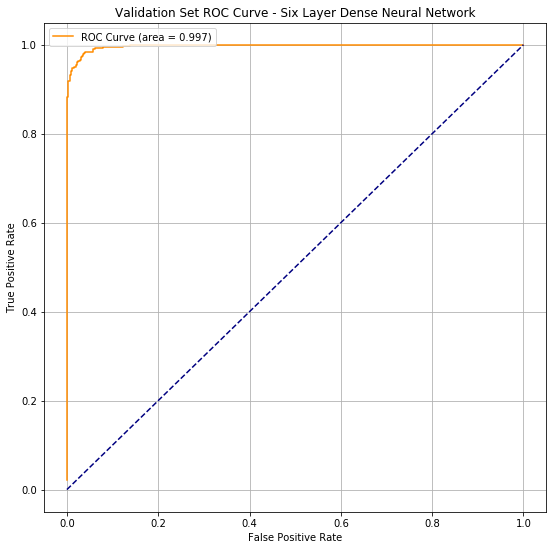

In [125]:
x = range(1)
y = range(1)
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(111)

plt.plot(fpr1, tpr1, color='darkorange', label=('ROC Curve (area = ' + area1 + ')')) 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(loc='upper left');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation Set ROC Curve - Six Layer Dense Neural Network')
plt.grid()

We can see that our ROC Score is 99.7%, which means that our model is doing a very good job of predicting the outcome of each game. However, before we jump to our feet and run to the sports betting websites, we have to realize that the features in our dataset contain data from the very games that we are trying to predict. In other words, we would have to wait through the entire game to collect and aggreagate the data from the game before cleaning it and feeding it to our dense, fully connected network. 

Unless we could do this very efficiently (instantly..) there is little use for this program in terms of actual sports betting. Still, it was a good way to practice using deep learning libraries to make a dense, fully connected neural netowrk and run that model on different operating systems (MacOS and Windows). It's important to remember that althouhg libraries such as TensorFlow have reached a relatively mature stage, the APIs that are often used on top of them such as Keras and TFlearn are constantly being updated and improved. 